<a href="https://colab.research.google.com/github/CynicDog/TheJavaBook/blob/main/TheJavaBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Configuration

In [ ]:
%%sh
# Install java kernel
wget -q https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip 
unzip -q ijava-1.3.0.zip 
python install.py

# Install proxy for the java kernel
wget -qO- https://gist.github.com/SpencerPark/e2732061ad19c1afa4a33a58cb8f18a9/archive/b6cff2bf09b6832344e576ea1e4731f0fb3df10c.tar.gz | tar xvz --strip-components=1
python install_ipc_proxy_kernel.py --kernel=java --implementation=ipc_proxy_kernel.py

EvalException: ignored

# Dependencies 

In [ ]:
import java.util.*; 
import java.util.stream.Collectors;

# 📔 LeetCode Clean Code Handbook: 50 Common Interview Questions - LeetCode admin

## Chapter 1. Array / String 

### 🧑🏼‍💻 [Two Sum (L#1)] 
: Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
___________________  

In [ ]:
class Solution {
    public int[] twoSum(int[] numbers, int target) { 

        Map<Integer, Integer> map = new HashMap<>(); 

        for (int i = 0; i < numbers.length; i++) { 
            int cur = numbers[i]; 
            if (map.containsKey(target - cur)) { 
                return new int[] { map.get(target - cur), i}; 
            }
            map.put(cur, i); // (key: cur , value: i)
        }
        throw new IllegalArgumentException("No two sum solution"); 
    }
}


### 🧑🏼‍💻 [Two Sum 2 - Input is Sorted (L#167)] 
: Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number.
___________________

In [ ]:
class Solution {
    public int[] twoSum(int[] numbers, int target) {
        for (int i = 0; i < numbers.length; i++) { 
            int j = binary_search(numbers, target - numbers[i], i + 1); 

            if (j != -1) { return new int[] { i + 1, j + 1 }; }
        } throw new IllegalArgumentException("No solution"); 
    }

    private int binary_search(int[] arg, int complement, int start) { 
        int left = start, right = arg.length - 1; 

        while (left < right) { 
            int mid = (left + right) / 2; 

            if (arg[mid] < complement) { 
                left = mid + 1; 
            } else { 
                right = mid; 
            }
        }

        return (left == right && arg[left] == complement) ? left : -1; 
    }
}

### 🧑🏼‍💻 [Two Sum 2 - Input is Sorted (L#167)] - two pointers 
  ___________________

In [ ]:
class Solution {
    public int[] twoSum(int[] numbers, int target) {
        int left = 0, right = numbers.length - 1; 

        while (left < right) { 
            int sum = numbers[left] + numbers[right]; 

            if (sum < target) { 
                left += 1; 
            } else if (sum > target) { 
                right -= 1; 
            } else { return new int[] { left + 1, right + 1 }; }
        } 
        throw new IllegalArgumentException("no solution");
    }
}

### 🧑🏼‍💻 [Valid Palindrome (L#125)] - two pointers 
: Given a string s, return true if it is a palindrome, or false otherwise.
___________________

In [ ]:
class Solution {
    public boolean isPalindrome(String s) {
        int i = 0, j = s.length() - 1; 

        while (i < j) { 
            while (i < j && !Character.isLetterOrDigit(s.charAt(i))) i++; 
            while (i < j && !Character.isLetterOrDigit(s.charAt(j))) j--; 

            if (Character.toLowerCase(s.charAt(i)) != Character.toLowerCase(s.charAt(j))) {
                return false; 
            }
            i++; j--; 
        } 
    return true; 
    }
}

### 🧑🏼‍💻 [Find the Index of the First Occurence in a String (L#28)] 
: Given two strings needle and haystack, return the index of the first occurrence of needle in haystack, or -1 if needle is not part of haystack.
___________________  

In [ ]:
class Solution {
    public int strStr(String haystack, String needle) {
        for (int i = 0; ; i++) { 
            for (int j = 0; ; j++) { 
                if (j == needle.length()) { return i; }
                if (i + j == haystack.length()) { return -1; }
                if (needle.charAt(j) != haystack.charAt(i + j)) { break; }
            }
        }
    }
}

### 🧑🏼‍💻 [Reverse Words in a String (L#151)] 
: Return a string of the words in reverse order concatenated by a single space.
___________________  

In [ ]:
class Solution { 
    public String reverseWords(String s) { 
        StringBuilder reversed = new StringBuilder(); 
        
        int j = s.length(); 
        
        for (int i = s.length() - 1; i >= 0; i--) { 
            if (s.charAt(i) == ' ') { 
                j = i; 
            } else if (i == 0 || s.charAt(i - 1) == ' ') { 
                if (reversed.length() != 0) { reversed.append(' '); } 

                reversed.append(s.substring(i, j)); 
            } 
        }
        
        return reversed.toString(); 
    }
} 

### 🧑🏼‍💻 [String to Integer(atoi) (L#8)] 
: Convert digits into an integer (i.e. "123" -> 123, "0032" -> 32). If no digits were read, then the integer is 0. Change the sign as necessary (from step 2).
___________________  

In [ ]:
class Solution { 
    private static final int maxDiv10 = Integer.MAX_VALUE / 10; 
    
    public int myAtoi(String s) { 
        
        int i = 0, n = s.length(); 
        
        while (i < n && Character.isWhitespace(s.charAt(i))) i++; 
        
        int sign = 1; 
        
        if (i < n && s.charAt(i) == '+') { i++; }
        else if (i < n && s.charAt(i) == '-') { sign = -1; i++; }
        
        int num = 0; 
        while (i < n && Character.isDigit(s.charAt(i))) { 
            int digit = Character.getNumericValue(s.charAt(i)); 
            
            if (num > maxDiv10 || num == maxDiv10 && digit >= 8) { 
                return sign == 1 ? Integer.MAX_VALUE : Integer.MIN_VALUE; 
            }
            
            num = num * 10 + digit; 
            i++; 
        }
        
        return sign * num; 
    }
}

### 🧑🏼‍💻 [Valid Number (L#65)] 
: Given a string s, return true if s is a valid number.
___________________  

In [ ]:
class Solution {
    public boolean isNumber(String s) {
        
        int i = 0, n = s.length(); 

        while (i < n && Character.isWhitespace(s.charAt(i))) i++; 

        if (i < n && (s.charAt(i) == '+' || s.charAt(i) == '-')) i++; 

        boolean isNumeric = false; 

        while (i < n && Character.isDigit(s.charAt(i))) { 
            i++; 
            isNumeric = true; 
        }

        if (i < n && s.charAt(i) == '.') { 
            i++;

            while (i < n && Character.isDigit(s.charAt(i))) { 
                i++; 
                isNumeric = true; 
            }
        }

        if (isNumeric && i < n && Character.toLowerCase(s.charAt(i)) == 'e') { 
            i++;
            isNumeric = false; 

            if (i < n && (s.charAt(i) == '+' || s.charAt(i) == '-')) i++; 

            while (i < n && Character.isDigit(s.charAt(i))) { 
                i++; 
                isNumeric = true;
            }
        }

        while (i < n && Character.isWhitespace(s.charAt(i))) i++; 

        return isNumeric && i == n; 
    }
}

### 🧑🏼‍💻 [Longest Substring Without Repeating Characters (L#3)] 
: Given a string s, find the length of the longest substring without repeating characters.
___________________  

In [ ]:
class Solution {
    public int lengthOfLongestSubstring(String s) {
        
        int[] charMap = new int[256]; 
        Arrays.fill(charMap, -1); 

        int i = 0, max_length = 0; 
        for (int j = 0; j < s.length(); j++) { 
            if (i <= charMap[s.charAt(j)]) { i = charMap[s.charAt(j)] + 1; } 
            else { max_length = Math.max(max_length, j - i + 1); }

            charMap[s.charAt(j)] = j; 
        }

        return max_length; 
    }
}

### 🧑🏼‍💻 [Longest Substring with At Most Two Distinct Characters (L#159)] 
: Given a string S, find the length of the longest substring T that contains at most two distinct characters. 
___________________  

In [ ]:
class Solution { 
    public int lengthOfLongestSubstringTwoDistinct(String s) { 
        
        int[] count = new int[256];
        int i = 0, maxLength = 0, numDistinct = 0; 

        for (int j = 0; j < s.length(); j++) { 
            if (count[s.charAt(j)] == 0) { numDistinct++; }
            count[s.charAt(j)]++; 

            while (numDistinct > 2) { 
                count[s.charAt(i)]--; 
                if (count[s.charAt(i)] == 0) { numDistinct--; }
                i++; 
            }

            maxLength = Math.max(maxLength, j - i + 1); 
        }

        return maxLength; 
    }
}

In [ ]:
Solution solution = new Solution(); 
solution.lengthOfLongestSubstringTwoDistinct("eceba");  

3

### 🧑🏼‍💻 [MIssing Range (L#163)] 
: Given a sorted integer array where the range of elements are [0, 99] inclusive, return its missing ranges. 
For example, given [0, 1, 3, 50, 75], return [“2”, “4->49”, “51->74”, “76->99”] 
___________________  

In [ ]:
class Solution { 

    public List<String> findMissingRanges(int[] vals, int start, int end) { 
        
        List<String> ranges = new ArrayList<>(); 

        int prev = start - 1; 

        for (int i = 0; i <= vals.length; i++) { 
            int cur = (i == vals.length) ? end + 1: vals[i]; 
            
            if (cur - prev >= 2) { 
                ranges.add(getRanges(prev + 1, cur - 1)); 
            }

            prev = cur; 
        }
        
        return ranges; 
    }

    private String getRanges(int from, int to) { 
        return (from == to) ? String.valueOf(from) : from + "->" + to; 
    }
}

In [ ]:
Solution solution = new Solution(); 
solution.findMissingRanges(new int[] {0, 1, 3, 50, 75}, 0, 99); 

[2, 4->49, 51->74, 76->99]

### 🧑🏼‍💻 [Longest Palindromic Substring (L#5)] 
: Given a string s, return the longest 
palindromic substring in s.
___________________  

In [ ]:
class Solution {
    public String longestPalindrome(String s) {
    
    int start = 0, end = 0;

    for (int i = 0; i < s.length(); i++) {

            int lenEven = expand(s, i, i);
            int lenOdd = expand(s, i, i + 1);

            int lenMax = Math.max(lenEven, lenOdd);

            if (lenMax > end - start) {
                start = i - (lenMax - 1) / 2;
                end = i + lenMax / 2;
            }
        }
        return s.substring(start, end + 1);
    }

    private int expand(String s, int left, int right) {
        int L = left, R = right;
    
        while (L >= 0 && R < s.length() && s.charAt(L) == s.charAt(R)) {
            L--;
            R++; 
    }
    return R - L - 1;
    }
}

In [ ]:
Solution solution = new Solution();
solution.longestPalindrome("abasljqadnn121nndsd")

dnn121nnd

### 🧑🏼‍💻 [One Edit Distance(L#161)] 
: Given two strings S and T, determine if they are both one edit distance apart.

Assume X represents the one-edit character. There are three one-edit distance operations that could be applied to S.

* i. Modify operation – Modify a character to X in S.
    * S = “abcde”, T = “abXde”

* ii. Insert operation – X was inserted before a character in S. 
    * S = “abcde”, T = “abcXde”

* iii. Append operation – X was appended at the end of S.
    * S = “abcde”, T = “abcdeX”

In [ ]:
class Solution { 
    public boolean isOneEditDistance(String S, String T) { 

        int m = S.length(), n = T.length(); 

        if (m > n) { return isOneEditDistance(T, S); }

        if (n - m > 1) { return false; }

        int i = 0;
        while(i < m && S.charAt(i) == T.charAt(i)) { i++; }

        int permit = n - m; 
        
        // catch append operation 
        if (i == m) { return permit > 0; }  

        // catch modify operation 
        if (permit == 0) i++;   

        // catch insert operation  
        while (i < m && S.charAt(i) == T.charAt(i + permit)) { i++; }   

        return i == m; 
    }
}

In [ ]:
Solution solution = new Solution();

System.out.println(solution.isOneEditDistance("abcde", "abXde"));       // modify operation 
System.out.println(solution.isOneEditDistance("abcde", "abcdeX"));      // insert operation 
System.out.println(solution.isOneEditDistance("abcde", "abcXde"));      // append operation 

System.out.println(solution.isOneEditDistance("abcde", "abcde"));
System.out.println(solution.isOneEditDistance("aaade", "abcde"));

true
true
true
false
false


## Chapter 2. Math 

### 🧑🏼‍💻 [Reverse Integer (L#7)]
: Given a signed 32-bit integer `x`, return `x` with *its digits reversed*. If reversing `x` causes the value to go outside the signed 32-bit integer range `[-2^31, 2^31 - 1]`, then return `0`.

In [ ]:
class Solution { 

    public int reverse(int x) { 

        int reversed = 0; 

        while (x != 0) { 

            if (Math.abs(reversed) > 214748364) { return 0; }

            reversed = reversed * 10 + x % 10; 
            x /= 10; 
        }

        return reversed;
    }
}

In [ ]:
Solution solution = new Solution();

System.out.println(solution.reverse(123));
System.out.println(solution.reverse(-321));

System.out.println(solution.reverse((int)Math.pow(2, 32)));

321
-123
0


### 🧑🏼‍💻 [Plus One (L#66)]
: Given a number represented as an array of digits, plus one to the number.

In [ ]:
class Solution {
    public int[] plusOne(int[] digits) {

        for (int i = digits.length - 1; i >= 0; i--) {

            if (digits[i] <= 8) { digits[i] += 1; return digits; } 
            else { digits[i] = 0;}
        }

        int[] result = new int[digits.length + 1];
        result[0] = 1;

        return result;
        
    }
}

In [ ]:
Solution solution = new Solution();

int[] output = solution.plusOne(new int[] {2,4,9,3,9});
for (int i = 0; i < output.length; i++) { System.out.print(output[i]); }

System.out.println();

int[] output = solution.plusOne(new int[] {9,8,9});
for (int i = 0; i < output.length; i++) { System.out.print(output[i]); }

System.out.println();

int[] output = solution.plusOne(new int[] {9,9});
for (int i = 0; i < output.length; i++) { System.out.print(output[i]); }

24940
990
100

### 🧑🏼‍💻 [Palindrome Number (L#19)]
: Determine whether an integer is a palindrome, without extra space

In [ ]:
class Solution { 

    public boolean isPalindrome(int x) { 

        if (x < 0) { return false; }

        int div = 1; 

        while (x / div >= 10) { div *= 10; }

        while (x != 0) { 
            int left = x / div; 
            int right = x % 10; 

            if (left != right) { return false; } 

            x = (x % div) / 10; 
            div /= 100; 
        }

        return true; 
    }
}

In [ ]:
Solution solution = new Solution(); 

System.out.println(solution.isPalindrome(123) == false); 
System.out.println(solution.isPalindrome(12321) == true); 

true
true


# 📔 The Java™ Tutorials - ORACLE Java Documentation 

## 🧑🏼‍💻 Generics

https://docs.oracle.com/javase/tutorial/java/generics/index.html

 In any nontrivial software project, bugs are simply a fact of life. Careful planning, programming, and testing can help reduce their pervasiveness, but somehow, somewhere, they'll always find a way to creep into your code. This becomes especially apparent as new features are introduced and your code base grows in size and complexity.

 Fortunately, some bugs are easier to detect than others. **Compile-time bugs, for example, can be detected early on**; you can use the compiler's error messages to figure out what the problem is and fix it, right then and there. **Runtime bugs**, however, can be much more problematic; they don't always surface immediately, and when they do, it may be at a point in the program that is far removed from the actual cause of the problem. 

 Generics add stability to your code by making more of your bugs detectable at compile time.

### 🧑🏼‍💻 Why Use Generics?

 In a nutshell, generics enable types (classes and interfaces) to be parameters when defining classes, interfaces and methods. Much like the more familiar formal parameters used in method declarations, type parameters provide a way for you to re-use the same code with different inputs. The difference is that the inputs to formal parameters are values, while the inputs to type parameters are types.

#### 👨🏻‍💻 **Stronger type checks at compile time**
: A Java compiler applies strong type checking to generic code and issues errors if the code violates type safety. Fixing compile-time errors is easier than fixing runtime errors, which can be difficult to find.

#### 👨🏻‍💻 **Elimination of casts**
: The following code snippet without generics requires casting:

In [ ]:
List list = new ArrayList();
list.add("hello");
String s = (String) list.get(0);

 When re-written to use generics, the code does not require casting: 

In [ ]:
List<String> list = new ArrayList<String>();
list.add("hello");
String s = list.get(0);   // no cast

#### 👨🏻‍💻 **Enabling programmers to implement generic algorithms**
: By using generics, programmers can implement generic algorithms that work on collections of different types, can be customized, and are type safe and easier to read.

### 🧑🏼‍💻 Generic Types 

**A *generic types* is a generic class or interface that is parameterized over tpyes.** 

The following `box` class will be modified to demonstrate the concept.

#### A Simple Box Class 

 Begin by examining a non-generic Box class that operates on objects of any type. It needs only to provide two methods: `set`, which adds an object to the box, and get, which retrieves it.

  Since its methods accpet or return an `Object`, you are free to pass in whatever you want, provided that it is not one of the primitive types. **There is no way to verify, at compile time, how the class is used.** One of the code may place an `Integer` in the box and expect to get `Integer`s out of it, while another part of the code may mistakenly pass in a `String`, resulting in a runtime error. 

In [ ]:
public class Box { 
    private Object object; 
    
    public void set(Object object) { this.object = object; } 
    public Object get() { return object; } 
}

#### A Generic Version of the Box Class 
 
 A *generic* class is defined with the following format: 
 
     class name<T1, T2, ..., Tn> { /* ... */ }
     
 The **type parameter section**, delimited by angle brackets, follows the class name. It specifies the *type parameters* T1, T2, ..., Tn. 
 
 To update the `Box` class to use generics, you create a generic type declaration by changing the code `public class Box` to `public class Box<T>`. This introduces the type variable, `T`, that cna be used anywhere inside the class. 
 
 With this change, the box class becomes as follows.  As you can see, all occurrences of `Object` are replaced by `T`. A type variable can be any `non-primitive` type you specify: **any class type, any interface type, any array type, or even another type variable.**
 
 This same technique can be applied to create generic interfaces. 

In [ ]:
public class Box<T> { 
    private T t; 

    public void set(T t) {this.t = t; } 
    public T get() { return t; } 
}

#### Type Parameter Naming Conventions 

 By convention, type parameter names are **single, uppercase letters.** This stands in sharp contrast to the variable naing conventions. 
 
 The most commonly used type parameter names are: 
 
 - E - Element (used extensively by Java Collections Framework) 
 - K - Key 
 - N - Number 
 - T - Type 
 - V - Value 
 - S, U, V etc. - 2nd, 3rd, 4th types 

#### Invoking and Instantiating a Generic Type 
 To reference the generic `Box` class, you must perform a *generic type invocation*, which replaces `T` with some concrete value, such as `Integer`: 

    Box<Integer> integerBox; 

##### Type Parameter and Type Argument Terminology 
 When coding, **one provides type arguments in order to create a parameterized type.** Therefore, the `T` in `Foo<T>` is a ***type parameter*** and the `String` in `Foo<String>` is a ***type argument***.
 
 To instantiate this class, use the new keyword, as usual, but place `Integer` between the class name and the parenthesis: 
 
    Box<Integer> integerBox = new Box<Integer>(); 

#### The Diamond 
 In Java SE 7 and later, you can replace the type arguments required to invoke the constructor of a generic class **with an empty set of type arguments(<>)** as long as the compiler can determine, or infer, the type arguments from the context. This pair of empty angle brakcets is informally called *the diamond*. 
    
    Box<Integer> integerBox = new Box<>(); 

#### Multiple Type Parameters 
 As mentioned previously, a generic class can have multiple type parameters. 

In [ ]:
public interface Pair<K, V> { 
    public K getKey(); 
    public V getValue(); 
}

class OrderedPair<K, V> implements Pair<K, V> { 

    private K key; 
    private V value; 

    public OrderedPair(K key, V value) {
        this.key = key; 
        this.value = value; 
    } 

    public K getKey() { return key; } 
    public V getValue() { return value; } 
}

OrderedPair<String, Integer> p1 = new OrderedPair<>("Java", 8);
OrderedPair<String, String> p2 = new OrderedPair<>("Hello", " World!");

#### Parameterized Types 
 You can also substitute a **type parameter** with a **parameterized type**. For example: 
 
    OrderedPair<String, Box<Integer>> p = new OrderedPair("Primes", new Box<Integer>(...)); 

#### Raw Types 

 A *raw type* is the name of a generic class or interface without any type arguments. 

 To create a parameterized `Box<T>`, you cana supply an actual type argument for the formal type parameter `T`: 

    Box<Integer> intBox = new Box<>(); 
    
 If, however, the actual type argument is omitted, you create a raw type of `Box<T>`: 
 
    Box rawBox = new Box(); 
    
 Therefore, `Box` is the raw tpye of the generic type `Box<T>`. However, a ***non-generic*** class or interfcae type is **not** a raw type. 
 
 Raw types show up in legacy code because lots of API classes (such as the `Collections` classes) were not generic prior to JDK 5.0. For ***backward compatibility***, assigning a parameterized type to its raw type is allowed: 
 
    Box<String> stringBox = new Box<>(); 
    Box rawBox = stringBox;   // ok 
    
 But if you assign a raw type to a parameterized type, you get a **unchecked conversion** warning: 
 
    Box rawBox = new Box() ;
    Box<String> stringBox = rawBox   // warning: unchecked conversion
    
 You also get a warning if you use a raw type to invoke generic methods defined in the corresponding generic type: 
 
    Box<String> stringBox = new Box<>(); 
    Box rawBox = stringBox; 
    
    rawBox.set(8);   // warning: unchecked invocation to set(T)

### 🧑🏼‍💻 Generic Methods 

 ***Generic methods* are methods that introduce their own type parameters.** This is similar to declaring a generic type, but the type parameters's scope is limited to the method where it is declared. **Static and non-static methods are allowed, as well as generic class constructors.** 

  The syntax for a generic method includes a list of type parameters, inside angle brackets, which appears before the method's return type. The feature known as **type reference** allows you to invoke a generic method as an ordinary method, without specifiying a type.

In [ ]:
public class Util {
    public static <K, V> boolean compare(Pair<K, V> p1, Pair<K, V> p2) { 
        return p1.getKey().equals(p2.getKey()) && p1.getValue().equals(p2.getValue()); 
    }
} 

public class Pair<K, V> {

    private K key;
    private V value;

    public Pair(K key, V value) {
        this.key = key;
        this.value = value;
    }

    public void setKey(K key) { this.key = key; }
    public void setValue(V value) { this.value = value; }
    public K getKey()   { return key; }
    public V getValue() { return value; }
}

Pair<Integer, String> p1 = new Pair<>(1, "apple");
Pair<Integer, String> p2 = new Pair<>(2, "pear");

boolean same_1 = Util.<Integer, String>compare(p1, p2); 
boolean same_2 = Util.compare(p1, p2);  // type can be left out

### 🧑🏼‍💻 Bounded Type Parameters 

 There may be times when you want to restrict the types **that can be used as type arguments in a parameterized type**. For example, a method that operates on numbers might only want to accept instances of `Number` or its subclasses. This is what bounded type parameters are for.

 To declare a bounded type parameter, list the type parameter's name, followed by the `extends` keyword, followed biy its *upper bound*, which in this example is `Number`. 

In [ ]:
public class Box<T> {

    private T t; 
    
    public void set(T t) { this.t = t; }
    public T get() { return t; } 
    
    public <U extends Number> void inspect(U u) { 
        System.out.println("T: " + t.getClass().getName());
        System.out.println("U: " + u.getClass().getName());
    } 
}

#### Multiple Bounds 

 A type parameter can have *multiple bounds*: 
 
     <T extends B1 & B2 & B3> 

 A type variable with multiple bounds is a subtype of all the types listed in the bound. **If one of the bounds is a class, it must be specified first**. For example:

    Class A { /* ... */ }
    interface B { /* ... */ }
    interface C { /* ... */ }
    
    class D <T extends A & B & C> { /* ... */ }

#### Generic Methods and Bounded Type Parameters 

 **Bounded type parameters are key to the implementation of generic algorithms.** 

 Consider the following method that counts the number of elements in an array `T[]` that are greater than a specified element `elem`.
 
     public static <T> int countGreaterThan(T[] anArray, T elem) { 
     
         int count = 0; 
         
         for (T e : anArray) {  
             if (e > elem) // compiler error 
                 ++count; 
         }
         return count; 
     } 
 
  The implementation of the method is straightforward, but it does not compile because **the greater than operator (>) applies only to primitive types** such as `short`, `int`, `double`, `long`, `float`, `byte`, and `char`. To fix the problem, use a type parameter bounded by the **`Comparable<T>`** interface: 
  
    public static <T extends Comparable<T>> int countGreaterThan(T[] anArray, T elem) { 
        
        int count = 0; 
        
        for (T e : anArray) { 
            if (e.compareTo(elem) > 0) { ++count; } 
        }
        return count; 
    }

### 🧑🏼‍💻 Generics, Inheritance, and Subtypes 

 It is possible to assign an object of one type to an object of another type provided that the types are compatible. For example, you can assign an `Integer` to an `Object`, since `Object` is one of `Integer`'s supertypes. 
 
 In object-oriented terminology, this is called an **"is a" relationship**. Since an Integer is a kind of `Object`, the assignment is allowed. But `Integer` is also a kind of `Number`, so the following code is valid as well:
 
    public void someMethod(Number n) { /* ... */ }

    someMethod(new Integer(10));   // OK
    someMethod(new Double(10.1));   // OK
 
 The same is also true with generics. You can perform a generic type invocation, passing `Number` as its type argument, and any subsequent invocation of add will be allowed if the argument is compatible with `Number`:
 
    Box<Number> box = new Box<Number>();
    box.add(new Integer(10));   // OK
    box.add(new Double(10.1));  // OK
    
#### Generic Classes and Subtyping 
 
 You can subtype a generic class or interface by extending or implementing it. The relationship between the type parameters of one class or interface and the type parameters of another are determined by the `extends` and `implements` clauses.

 Using the Collections classes as an example, `ArrayList<E>`implements `List<E>`, and `List<E>` extends `Collection<E>`. So `ArrayList<String>` is a subtype of `List<String>`, which is a subtype of `Collection<String>`. **So long as you *do not vary* the type argument, the subtyping relationship is preserved between the types.**

### 🧑🏼‍💻 Type Inference

 **Type inference is a Java compiler's ability to look at each method invocation and corresponding declaration to determine the type argument (or arguments) that make the invocation applicable.** The inference algorithm determines the types of the arguments and, if available, the type that the result is being assigned, or returned. Finally, the inference algorithm tries to find the most specific type that works with all of the arguments.

To illustrate this last point, in the following example, inference determines that the second argument being passed to the pick method is of type `Serializable`:

#### Type Inference and Generic Methods 

 **Generic Methods introduced you to type inference**, which enables you to invoke a generic method as you would an ordinary method, without specifying a type between angle brackets. Consider the following example, `BoxDemo`, which requires the `Box` class:

    static <T> T pick(T a1, T a2) { return a2; }
    Serializable s = pick("d", new ArrayList<String>());

    public class BoxDemo {

        public static <U> void addBox(U u, List<Box<U>> boxes) {
            Box<U> box = new Box<>();
            box.set(u);
            boxes.add(box);
        }

        public static <U> void outputBoxes(java.util.List<Box<U>> boxes) {
            int counter = 0;
            for (Box<U> box: boxes) {
                U boxContents = box.get();
                System.out.println("Box #" + counter + " contains [" + boxContents.toString() + "]");
                counter++;
            }
        }
        
        public static void main(String[] args) { 
             ArrayList<Box<Integer>> listOfIntegerBoxes = new ArrayList<>(); 
             
             BoxDemo.<Integer>addBox(Integer.valueOf(10), listOfIntegerBoxes); // type witness
             BoxDemo.addBox(integer.valueOf(20), listOfIntegerBoxes); 
             BoxDemo.addBox(integer.valueOf(30), listOfIntegerBoxes); 
             
             BoxDemo.outputBoxes(listOfIntegerBoxes); 
         }
     } 
     
 The generic method `addBox` defines one type parameter named `U`. **Generally, a Java compiler can infer the type parameters of a generic method call.** Consequently, in most cases, you do not have to specify them. For example, to invoke the generic method `addBox`, you can specify the type parameter with a **type witness**. 
 
### Type Inference and Instantiation of Generic Classes 

 You can replace the type arguments required to invoke the constructor of a generic class with an **empty set of type parameters (<>)** as long as the compiler can infer the type arguments from the context. This pair of angle brackets is informally called *the diamond*.
 
 For example, consider the following variable declaration:

    Map<String, List<String>> myMap = new HashMap<String, List<String>>();
    
 You can substitute the parameterized type of the constructor with an empty set of type parameters (<>):

    Map<String, List<String>> myMap = new HashMap<>();
    
 Note that, to take advantage of <u>**type inference during generic class instantiation, you must use the diamond.**</u>  
 
    Map<String, List<String>> myMap = new HashMap(); // unchecked conversion warning 
    
### Type Inference and Generic Constructors of Generic and Non-Generic Classes 

 Note that constructors also can be generic in **both generic and non-generic classes.** 
 
    class MyClass<X> { 
        <T> MyClass(T t) { /*...*/ }
    }
    
    MyClass<Integer> my_class = new MyClass<Integer>(""); // OK 
    
### Target Types 

 The Java compiler takes advantage of target typing to infer the type parameters of a generic method invocation. The ***target type* of an expression is the data type that the Java compiler expects depending on where the expression appears.** Consider the method `Collections.emptyList`, which is declared as follows: 
     
     static <T> List<T> emptyList(); 
     
 Consider the following assignment statement: 
 
     List<String> listOne = Collections.emptyList(); 
     
 This statement is expecting an instance of `List<String>`; **this data type is the target type**. Because the method `emptyList` returns a value of type `List<T>`, the compiler infers that the type argument `T` must be the value `String`. Alternatively, you could use a type witness and specify the value of `T` as follows: 
 
     List<String> listOne = Collections.<String>emptyList();

### 🧑🏼‍💻 Wildcards

 In generic code, the question mark(`?`), called the *wildcard*, represents an unknown type. The wildcard can be used in a variety of situations: as the type of a parameter, field, or local variable; sometimes as a return type. The wildcaard is <u>**never used as a type argument for a generic method invocation, a generic class instance creation, or a supertype.**</u>

#### Upper Bounded Wildcards

 You can use an upper bounded wildcard to relax the restrictions on a variable. For example, say you want to write a method that works on `List<Integer>`, `List<Double>`, `List<Number>`; you can achieve this by using an upper bounded wildcard. 

 To write the method that works on lists of `Number` and the subtypes of `Number`, such as `Integer`, `Double`, and `Float`, you would specify `List<? extends Number>`. The term `List<Number>` is more restrictive than `List<? extends Number>` because the former matches a list of type `Number` only, whereas the latter matches a list of type `Number` or any of its subclasses.

 Consider the following `process` method: 

    public static void process(List<? extends Foo> list) { /* ... */} 

In [ ]:
public static double sumOfList(List<? extends Number> list)  { 
    
    double s = 0.0; 

    for (Number n: list) { s += n.doubleValue(); }

    return s; 
}

List<Number> nums = new ArrayList<Number>(); 
nums.add(1);
nums.add(new Integer(2));

nums.add(2.2); 
nums.add(new Double(3.3)); 

System.out.println(sumOfList(nums)); 
System.out.println(sumOfList(Arrays.asList(1, 2, 3)));

8.5
6.0


#### Unbounded Wildcards 

 The unbounded wildcard type is specified using the wildcard characte(`?`), for example, `List<?>`. This is called a *list of unknown type*. There are two scenarios where an unbounded wildcard is a useful approach: 

* If you are writing a method that can be implemented using functionality provided in the `Object` class. 
* When the code is using methods in the generic class that don't depend on the type parameter. In fact, `Class<?>` is so often used because most of the methods in `Class<T>` do not depend on `T`.  


 Consider the method below, `printList1`. The goal of `printList1` is to print a list of any type, but it fails to achieve that goal — it prints only a list of `Object` instances; it cannot print `List<Integer>`, `List<String>`, `List<Double>`, and so on, because <u>**they are not subtypes**</u> of `List<Object>`. To write a generic `printList` method, use `List<?>` as in `printList2`.

In [ ]:
public static void printList1(List<Object> list) { 
    for (Object elem: list) { 
        System.out.println(elem + " "); 
    }

    System.out.println(); 
}

In [ ]:
public static void printList2(List<?> list) { 
    for (Object elem: list) { 
        System.out.println(elem + " "); 
    }

    System.out.println(); 
} 

In [ ]:
List<String> str = Arrays.asList("one", "two");
List<Integer> ints = Arrays.asList(3, 4);
List<Double> dbls = Arrays.asList(5.0, 6.0); 

List<Object> objs = Arrays.asList(str, ints, dbls);

printList1(objs); // ??  
printList2(objs);

[one, two] 
[3, 4] 
[5.0, 6.0] 

[one, two] 
[3, 4] 
[5.0, 6.0] 



#### Lower Bounded Wildcards

 An upper bounded wildcard restricts the unknown type to be a specific type or a <u>subtype</u> of that type and is represented using the extends keyword. In a similar way, a **lower bounded wildcard restricts the unknown type to be a specific type or a <u>super</u> type of that type.**

 A lower bounded wildcard is expressed using the wildcard character (`?`), following by the `super` keyword, followed by its lower bound: `<? super A>`. 

 Say you want to write a method that puts `Integer` objects into a list. To maximize <u>**flexibility**</u>, you would like the method to work on `List<Integer>`, `List<Number>`, and `List<Object>` — anything that can hold `Integer` values.

 To write the method that works on lists of `Integer` <u>**and**</u> the supertypes of `Integer`, such as `Integer`, `Number`, and `Object`, you would specify `List<? super Integer>`. The term `List<Integer>` is more restrictive than `List<? super Integer>` because the former matches a list of type `Integer` only, whereas the latter matches a list of any type that is a supertype of `Integer`.

In [ ]:
public static List addNumbers(List<? super Integer> list) { 
    for (int i = 1; i <= 10; i++) {
        list.add(i); 
    }

    return list; 
}

List list_ = addNumbers(new ArrayList<>());

printList2(list_);

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 



#### Wildcards and Subtyping 

 Generic classes or interfaces are not related merely because there is a relationship between their types. <u>**However, you can use wildcards to create a relationship between generic classes or interfaces.**</u>

 Given the following two regular classes: 

    class A {/* ... */}
    class B extends A {/* ... */}

 It would be reasonable to write the following code:
    
    B b = new B(); 
    A a = b; 

 This example shows that <u>**inheritance of regular classes follows this rule of subtyping**</u>: class B is a subtype of class A if B extends A. This rule does not apply to generic types:

    List<B> list_b = new ArrayList<>(); 
    List<A> list_a = list_b; // 🙅🏻 compile-time error 

 Although Integer is a subtype of Number, `List<Integer>` is <u>**not a subtype**</u> of `List<Number>` and, in fact, these two types are <u>**not related**</u>. The common parent of `List<Number>` and `List<Integer>` is `List<?>`.


 In order to create a relationship between these classes so that the code can access Number's methods through List<Integer>'s elements, use an upper bounded wildcard:

    List<? extends Integer> integer_list = new ArrayList<>(); 
    List<? extends Number> number_list = integer_list; // 🙆🏻 OK 

 

#### Wildcard Capture and Helper Methods 

 In some cases, the compiler <u>**infers the type of a wildcard**</u>. For example, a list may be defined as List<?> but, when evaluating an expression, the compiler infers a particular type from the code. This scenario is known as <u>**wildcard capture**</u>.

 The `WildcardError` example produces a capture error when compiled. 

 In the `WildcardError` example, the compiler processes the `i` input parameter as being of type `Object`. When the `foo` method invokes `List.set(int, E) `, the compiler is <u>not able to confirm the type of object that is being inserted into the list</u>, and an error is produced. When this type of error occurs it typically means that <u>**the compiler believes that you are assigning the wrong type to a variable**</u>. Generics were added to the Java language for this reason - to enforce type saftey at compile time. 

 You can fix it by writing a <u>*private helper method*</u> which captures the wildcard. 

 By conveintion, helper methods are generally named 
 
    originalMethodNameHelper


In [ ]:
public class WildcardError {

    void foo(List<?> i) { 
        // i.set(0, i.get(0)); 
        // 🙅🏻 incompatible types
    }
}

In [ ]:
public class WildcardFixed { 

    void foo(List<?> i) { 
        fooHelper(i); 
    }

    private <T> void fooHelper(List<T> j) { 
        j.set(0, j.get(0)); 
    }
}

// 🙆🏻 OK 

#### Guidelines for Wildcard Use

 - **An "In" Variable**: 
 
: An "In"  variable serves up data to the code. Imagine a copy method with two arguments: `copy(src, deset)`. The `src` argument provides the data to be copied, so it is the "In" parameter. 

 - **An "Out" Variable**: 

: An "Out" variable holds data for use elsewhere. In the `copy` example, the `dest` argument accepts data, so it is the "Out" parameter. 

- **Wildcard Guidelines**: 

: An <u>**"in" variable**</u> is defined with <u>**an upper bounded wildcard, using the extends keyword.**</u>
An <u>**"out" variable**</u> is defined with <u>**a lower bounded wildcard, using the super keyword.**</u> 
In the case where the "in" variable can be accessed using methods defined in the Object class, use an unbounded wildcard.
In the case where the code needs to access the variable as <u>**both an "in" and an "out" variable, do not use a wildcard.**</u>

 These guidelines do not apply to a method's return type. <u>Using a wildcard as a return type should be avoided</u> because it forces programmers using the code to deal with wildcards. 

 <u>A list defined by `List<? extends ...>` can be informally thought of as **read-only**</u>, but that is not a strict guarantee. Suppose you have the following two classes:

In [ ]:
class NaturalNumber { 

    private int i; 

    public NaturalNumber(int i) { this.i = i; } 
}

class EvenNumber extends NaturalNumber { 

    public EvenNumber(int i) { super(i) ;}
}

List<EvenNumber> list_even = new ArrayList<>(); 

// list_ntrl.add(new NaturalNumber(35)); 
// 🙅🏻 compile-time error, since the method `add` puts a value into the list, which "In" variable cannot do.

In [ ]:
public double sum(Collection<? extends Number> nums) { 
    double s = 0.0;

    for (Number num : nums) { s+= num.doubleValue(); }  

    return s;
}

In [ ]:
List<Integer> ints = new ArrayList<Integer>(); 
ints.add(1); 
ints.add(2); 

List<? extends Number> nums = ints; 

double result = sum(nums);  // 🙆🏻 OK 

// nums.add(3);    
// 🙅🏻 compile-time error, since the method `add` puts a value into the list, which "In" variable cannot do.

In [ ]:
List<Object> objs = new ArrayList<Object>();
objs.add(1); 
objs.add("two"); 

List<? super Integer> ints = objs; 

ints.add(3); // // 🙆🏻 OK 

// double result = sum(ints); 
// 🙅🏻 compile-time error, since the method `sum` gets a value out of the list, which "Out" variable cannot do.

true

### 🧑🏼‍💻 Type Erasure 

 Generics were introduced to the Java language to provide tighter type checks at compile time and to support generic programming. To implement generics, the Java compiler appiles type erasure to: 

- <u>**Replace all type parameters in generic types with their bounds or `Object` if the type parameters are unbounded**</u>. The produced bytecode contains only ordinary classes, interfaces, and methods. 
- Insert type casts if necessary to preserve type safety. 
- Generate <u>bridge methods to preserve polymorphism in extended generic type</u>. 

#### Erasure of Generic Types 

 During the type erasure process, the Java compiler erases all type parameters and replaces each with its first bound if the type parameter is bounded, or `Object` if the type parameter is not bounded. Consider the first following generic class that represents a node in a singly linked list. Because the type parameter `T` is unbounded, the Java compiler replaces it with `Object`. 

  In the second example, the generic `Node` class uses a bounded type parameter. The Java compiler replaces the bounded type parameter `T` with the first bound class, `Comparable`. 

In [ ]:
public class Node<T> { 

    private T val; 
    private Node<T> next; 

    public Node(T val, Node<T> next) { 
        this.val = val; 
        this.next = next; 
    }

    public T getValue() { return val; }
}

Node<Integer> node = new Node(Integer.valueOf(1), null);
node.getValue();

1

In [ ]:
public class Node<T extends Comparable<T>> { 
    
    private T val; 
    private Node<T> next; 

    public Node(T val, Node<T> next) { 
        this.val = val; 
        this.next = next; 
    }

    public T getValue() { return val; }
}

#### Erasure of Generic Methods 

 The Java compiler also erases type parameters in generic method arguments. Consider the first following method. Because `T` is unbounded, the Java compiler replaces with `Object`. 


In [ ]:
public static <T> int count(T[] anArray, T elem) { 
    int freq = 0; 

    for (T e : anArray) { 
        if (e.equals(elem)) { ++freq; } 
    }

    return freq; 
} 

In [ ]:
public static int count(Object[] anArray, Object elem) {
    int cnt = 0;
    for (Object e : anArray)
        if (e.equals(elem))
            ++cnt;
        return cnt;
}

#### Effects of Type Erasure and Bridge Methods 

 Somtimes type erasure causes a situation that you may not have anticipated. The following example shows how this can occur. 

 The following example shows how a compiler sometimes creates a synthetic method, which is called a <u>*bridge method*</u>, as part of the type erasure process. 

Given two follwoing classes. 

After type erasure, the method signatures do not match. 

The `Node.setData(T)` method becomes `Node.setData(Object)`. As a result, the `MyNode.setData(Integer)` method does not override the `Node.setData(Object)` method.

For the `MyNode` class, the compiler generates the following <u>*bridge method*</u> for `setData`. 

In [ ]:
public class Node<T> {

    public T data; 

    public Node(T data) { this.data = data; }

    public void setData(T data) { 
        System.out.println("Node.setData"); 
        this.data = data;  
    }
}

public class MyNode extends Node<Integer> { 

    public MyNode(Integer data) { super(data); }

//  Bridge method generated by the compiler
//  public void setData(Object data) { 
//      setData((Integer) data); 
//  }

    public void setData(Integer data) { 
        System.out.println("MyNode.setData"); 
        super.setData(data); 
    }
}

In [ ]:
MyNode my_node = new MyNode(5); 
Node node = my_node; 

Integer x = my_node.data; 

#### Non-Reifiable Types 

: A <u>**reifiable** is a type whose type information is fully available at runtime</u>. This includes primitives, non-generic types, raw types and invocations of unbound wildcards. 

<u>**Non-reifiable** types are types where information has been removed at compile-time by type erasure</u> - invocations of 

## Interfaces and Inheritance

https://docs.oracle.com/javase/tutorial/java/IandI/index.html

## Annotations

https://docs.oracle.com/javase/tutorial/java/generics/index.html

# 🛠 Functional Programming

## 📔 Modern Java in Action - Lambda, streams, functional and reactive programming

### Dependencies

In [568]:
import java.util.*;
import java.util.stream.*;
import java.util.stream.Collectors;
import java.util.stream.Collectors.*;
import java.util.Collections.*;

import java.io.*;
import java.io.File; 
import java.io.FileWriter; 

import java.nio.charset.*;
import java.nio.file.Paths;
import java.nio.file.Files;

import static java.util.Comparator.comparing;

### Chapter 4. Introducing streams

#### 4.1 What are streams? 

$Streams$ are an update to the Java API that let you <u>manipulate collections of data in a declarative way</u>, that is you express a query rather than code an ad hoc implementation for it. In addition, streams <u>can be processed in parallel transparently</u>, without you having to write any multithreaded code. 

In [673]:
// #@title specification
public class Dish { 

    public final String name; 
    public final int calorie;
    public final boolean vegetarian; 
    public final Type type;

    Dish(String name, int calorie, boolean vegetarian, Type type) { 
        this.name = name; 
        this.calorie = calorie; 
        this.vegetarian = vegetarian; 
        this.type = type; 
    }    

    public String getName()         { return name; }
    public int getCalorie()         { return calorie; }
    public boolean isVegetarian()   { return vegetarian; }
    public Type getType()           { return type; } 

    @Override
    public String toString() { return name; } 

    public enum Type { MEAT, FRUIT, FISH }
}

public class Order { 
    
    public final List<Dish> items; 

    Order(List<Dish> items) { this.items = items; }

    public List<Dish> getItems() { return this.items; }
}

List<Dish> menu = List.of(
    new Dish("Chontaduro", 50, true, Dish.Type.FRUIT), 
    new Dish("Borojo", 40, true, Dish.Type.FRUIT),
    new Dish("Maracuya", 20, true, Dish.Type.FRUIT), 
    new Dish("Naranja", 15, true, Dish.Type.FRUIT), 
    new Dish("Guava", 10, true, Dish.Type.FRUIT), 
    new Dish("Platano", 40, true, Dish.Type.FRUIT), 
    new Dish("Pork", 150, false, Dish.Type.MEAT), 
    new Dish("Chicken", 90, false, Dish.Type.MEAT), 
    new Dish("Beef", 130, false, Dish.Type.MEAT), 
    new Dish("Salmon", 70, false, Dish.Type.FISH) 
); 

In [675]:
menu.stream() 
    .filter(dish -> dish.getCalorie() < 100) 
    .sorted(comparing(Dish::getCalorie))
    .map(Dish::getName)
    .collect(Collectors.toList())
    .forEach(item -> System.out.print(item + " "));

Guava Naranja Maracuya Borojo Platano Chontaduro Salmon Chicken 

 You can see some benefits in using stream API: 
 - $Declarative$: <u>The code is written in a declarative way</u>: you specify what you want to achieve, not how to implement such operations. This enables you to cope with changing requirements. 
 - $Composable$: we chain together several building-block operations to <u>express a complicated data-processing pipeline while keeping your code readable.</u>
 - $Parallelizable$: Because operations such as `filter()`, `sorted()`, `map()`, or `collect()` are available as <u>high-level building blocks</u> that don't depend on a specific threading model, their internal implementation could be single-threaded or could potentially maximize your multicore architecture transparently. 

#### 4.2 Getting started with streams

Collections in Java 8 support a new `stream` method that returns a stream. The definition of stream is <u>**a sequence of elements supporting sequential and parallel aggregate operations.**</u> In addition, stream operations have two more important characteristics: 

1. <u>**Pipelining**</u> - many stream operations return a stream themselves, allowing operations to be chained to form a larger pipeline. This enables certain optimizations such as laziness and short-circuiting. 

2. <u>**Internal iteration**</u> - in contrast to collections, which are iterated explicitly using an iterator, stream operations do the iteration behind the scenes for you. 

In [576]:
menu.stream()
    .filter(dish -> dish.getCalorie() > 50)
    .sorted(comparing(Dish::getCalorie).reversed())
    .limit(3)
    .map(Dish::getName)
    .collect(Collectors.toList())
    .forEach(item -> System.out.print(item + " "));

Pork Beef Chicken 

#### 4.3 Streams vs. Collections

 Both the existing Java notion of collections and the new notion of streams provide interfaces to data structures representing <u>a sequenced set of values of the element type</u>. By sequenced, we mean that we commonly step through the values in turn rather than randomly accessing them in any order. 

 The difference between collections and streams has to do with $when$ things are computed. A collection is an <u>**in-memory**</u> data structure that holds all the values - every element in collection has to be computed <u>**before**</u> it can be added to the collection. 

 In contrast, a stream is a <u>**conceptually fixed**</u> data structure whose elements are <u>**computed on demand**</u>. Another view is that a stream is like a <u>**lazily constrcuted**</u> collection: values are computed when they are solicited by a consumer. A collection is, however, <u>**eagerly constructed**</u>. 

##### <font color='#F06C7C'> 4.3.1 Traversable only once 

In [577]:
List<String> title = Arrays.asList("Modern", "Java", "in", "Action"); 
title.stream()
        .forEach(System.out::println);

//      .forEach(System.out::println);   ->   `java.lang.IllegalStateException`

Modern
Java
in
Action


##### <font color='#F06C7C'> 4.3.2 External vs. Internal iteration

Using the `Collection` interface requires iteration to be done by the user; this is called <u>external iteration</u>. The `Stream` library uses <u>internal iteration</u> - it does the iteration for you and takes care of storing the resulting stream values somewhere. 

Using an internal iteration, the processing of items could be <u>transparently done in parallel</u> or in a different order that may <u>be more optimized</u>. These optimizations are difficult if you iterate the collection externally as you’re used to doing in Java.

#### 4.4 Stream Operations 

The operations that streams interface defines can be classified into two categories. 

- <u>**Intermediate operations**</u> - `filter`, `map`, and `limit` can be connected together to form a pipeline. 
- <u>**Terminal operations**</u> - `collect` causes the pipeline to be executed and closes it. 

##### <font color='#F06C7C'> 4.4.1 Intermediate operations 

Intermediate operations such as `filter` or `sorted` return another stream as the return type. This allows the operations to be connected to form a query. What's important is that intermediate operations don't perform any processing until a terminal operation is invoked on the stream pipeline - meaning that they are <u>lazy</u>. 

##### <font color='#F06C7C'> 4.4.2 Terminal operations 

Terminal operations produce a result from a stream pipeline. A result is any <u>**non-stream**</u> value such as `List`, an `Integer` or even `void`. 

In [578]:
menu.stream()
    .filter(dish -> dish.getCalorie() > 50)
    .distinct()
    .count()

4

##### <font color='#F06C7C'> 4.4.3 Working with streams

To summerize, working with streams in general involves three items: 

- A <u>data source</u> to perform a query on 
- A chain of <u>intermediate operations</u> that form a stream pipeline 
- A <u>terminal operation</u> that executes the stream pipeline and produces a result 

### Chapter 5. Working with streams 

#### 5.1 Filtering

##### <font color='#F06C7C'> 5.1.1 Filtering with a predicate - `filter`

The `Stream`interface supports a `filter` method. This operation takes as argument a $predicate$ (a function returning a `boolean`) and returns a stream including all elements that match the predicate. 

In [678]:
menu.stream()
    .filter(dish -> dish.isVegetarian())
    .sorted(comparing(Dish::getName))
    .forEach(item -> System.out.print(item + " "));

Borojo Chontaduro Guava Maracuya Naranja Platano 

##### <font color='#F06C7C'> 5.1.2 Filtering unique elements - `distinct`

Streams also support a method called `distinct` that returns a stream with unique elements.

In [679]:
List<Integer> numbers = List.of(1, 2, 2, 3, 4, 4, 4, 5);

numbers.stream()
            .filter(num -> num % 2 == 0)
            .distinct()
            .forEach(System.out::println);

2
4


#### 5.2 Slicing a stream 

There are operations available that let you efficiently select or drop elements using a predicate, ignore the first few elements of a stream, or truncate a stream to a given size. 

##### <font color='#F06C7C'> 5.2.1 Slicing using a predicate - `takeWhile`, `dropWhile`

The `takeWhile` operation lets you slice any stream using a predicate. It scopes once it has found an element that <u>fails to match</u>. The `dropWhile` is the complement of `takeWhile`. 

In [680]:
List<Dish> orderedInCalrorie = menu.stream()
                                    .sorted(comparing(Dish::getCalorie))
                                    .collect(Collectors.toList()); 

In [681]:
orderedInCalrorie.stream()
                    .takeWhile(dish -> dish.getCalorie() < 50)
                    .forEach(item -> System.out.print(item + " "));

Guava Naranja Maracuya Borojo Platano 

In [682]:
orderedInCalrorie.stream()
                    .dropWhile(dish -> dish.getCalorie() < 50)
                    .forEach(item -> System.out.print(item + " ")); 

Chontaduro Salmon Chicken Beef Pork 

##### <font color='#F06C7C'> 5.2.2 Truncating a stream - `limit`

Streams support the `limit(n)` method, which returns another stream that is no longer than a given size. 

In [683]:
menu.stream()
    .sorted(comparing(Dish::getCalorie).reversed())
    .limit(5)
    .forEach(item -> System.out.print(item + " ")); 

Pork Beef Chicken Salmon Chontaduro 

##### <font color='#F06C7C'> 5.2.3 Skipping elements - `skip`

Stream supports the `skip` method to return a stream that discards the first `n` elements. If the stream has fewer than `n` elements, an empty stream is returned. 

In [684]:
menu.stream()
    .sorted(comparing(Dish::getCalorie).reversed())
    .skip(3)
    .limit(5)
    .forEach(item -> System.out.print(item + " ")); 

Salmon Chontaduro Borojo Platano Maracuya 

#### 5.3 Mapping 

A common data processing idiom is to select information from certain objects. The Stream API provides such facilities through the `map` and `flatMap` methods. 

##### <font color='#F06C7C'> 5.3.1 Applying a function to each element of a stream - `map` 

Streams support the `map` method, which takes a function as argument. The function is applied to each element, mapping it into new element. 

In [685]:
List<String> words = List.of("Modern", "Java", "in", "Action");
words.stream()
        .map(String::length)
        .forEach(item -> System.out.print(item + " "));

6 4 2 6 

In [686]:
menu.stream()
    .map(Dish::getName)
    .map(String::length)
    .forEach(item -> System.out.print(item + " ")); 

10 6 8 7 5 7 4 7 4 6 

##### <font color='#F06C7C'> 5.3.2 Flattening streams - `flatMap`

Using the `flatMap` has the effect of mapping each array <u>**not with a stream but with the contents of that stream**</u>. All the seperate streams that were generated when using `map(Arrays::stream)` get <u>amalgamated</u>. 

In [687]:
List<String> greeting = List.of("Hello", "Java", "!"); 

greeting.stream()
            .map(word -> word.split(""))
            .flatMap(Arrays::stream)
            .forEach(item -> System.out.print(item + " "));

H e l l o J a v a ! 

In [688]:
// #@title specification
List<Dish> fruits = 
    menu.stream().filter(dish -> dish.getType() == Dish.Type.FRUIT).collect(Collectors.toList());
                            
List<Dish> meats = 
    menu.stream().filter(dish -> dish.getType() == Dish.Type.MEAT).collect(Collectors.toList()); 

List<Dish> fishes = 
    menu.stream().filter(dish -> dish.getType() == Dish.Type.FISH).collect(Collectors.toList());

List<Order> orders = List.of(new Order(fruits), new Order(meats), new Order(fishes));

In [689]:
orders.stream()
    .flatMap(order -> order.getItems().stream())
    .forEach(item -> System.out.print(item + " "));

Chontaduro Borojo Maracuya Naranja Guava Platano Pork Chicken Beef Salmon 

#### 5.4 Finding and matching

##### <font color='#F06C7C'> 5.4.1 Checking to see if a predicate matches at least one element - `anyMatch`

In [690]:
menu.stream().anyMatch(Dish::isVegetarian)

true

##### <font color='#F06C7C'> 5.4.2 Checking to see if a predicate matches all elements - `allMatch`, `noneMatch`

In [691]:
menu.stream().allMatch(dish -> dish.getCalorie() >= 10)

true

In [692]:
menu.stream().noneMatch(dish -> dish.getCalorie() < 10)

true

##### <font color='#F06C7C'> 5.4.3 Finding an element - `findAny`

The `findAny` method returns an arbitrary element of the current stream. It can be used in conjunction with other stream operations. 

The `Optional<T>` class is a container class to represent the existence or absence of a value. Instead of returning `null`, which is well known for being error-prone, the Java 8 library introduces `Optional<T>`. Some few methods are below: 

- `isPresent()` returns `true` if `Optional` contains a value, `false` otherwise.
- `ifPresent(Consumer<T> block)` executes the given block if a value is present. 
- `T get()` returns the value if present; otherwise it throws a `NoSuchElementExecution`. 
- `T orElse(T other)` returns the value if present; otherwise it returns a default value. 

In [693]:
menu.stream()
    .filter(Dish::isVegetarian)
    .findAny()              // returns Optional[Chontaduro]
    .ifPresent(dish -> System.out.println(dish.getName())); 

Chontaduro


#### 5.5 Reducing

##### <font color='#F06C7C'> 5.5.1 Summing the elements - `reduce`, `Integer::sum`

The `reduce` method takes two arguments: 

- An initial value. 
- A `BinaryOperator<T>` to combine two elements and produce a new value. 

In [694]:
List<Integer> nums = List.of(1, 2, 3, 4, 5);

nums.stream()
    .reduce(0, (x, y) -> x + y);

15

In [695]:
nums.stream()
    // method reference
    .reduce(0, Integer::sum);

15

In [696]:
nums.stream()
    .reduce((a, b) -> (a * b))      // returns Optional type 
    .get();

120

##### <font color='#F06C7C'> 5.5.2 Maximum and minimum - `reduce`, `Integer::min`, `Integer::max`

In [697]:
System.out.println(nums.stream().reduce(Integer::max).get());
System.out.println(nums.stream().reduce(Integer::min).get());

5
1


##### Benefit of the reduce method and parallelism 

The benefit of using `reduce` compared to the step-by-step iteration summation is that the iteration is abstracted using internal iteration, which enables the internal implementation to choose to perform the operation in parallel. 

 But there is a price to pay to execute  this code in parallel: the lambda passed to `reduce` can't change state, and the operation needs to be associative and communicative so it can be executed in any order. 

In [698]:
nums.parallelStream().reduce(0, Integer::sum)

15

##### Stream operations: stateless vs. stateful

Operations like `map` and `filter` take each element from the input stream and produce zero or one result in the output stream. These operations are in general <u>**stateless**</u>: they don't have an internal state.

But operations like `reduce`, `sum` or `max/min` need to have internal state to accumulate the result. The internal state is of <u>**bounded size**</u> no matter how many elements are in the stream being processed. 

By contrast, some operations like `sorted` or `distinct` require knowing the previous history to do their job, so the storage requirement of the operation is <u>**unbounded**</u>. This can be problematic if the data stream is large or infinite. These are called <u>**statefull**</u> operations.


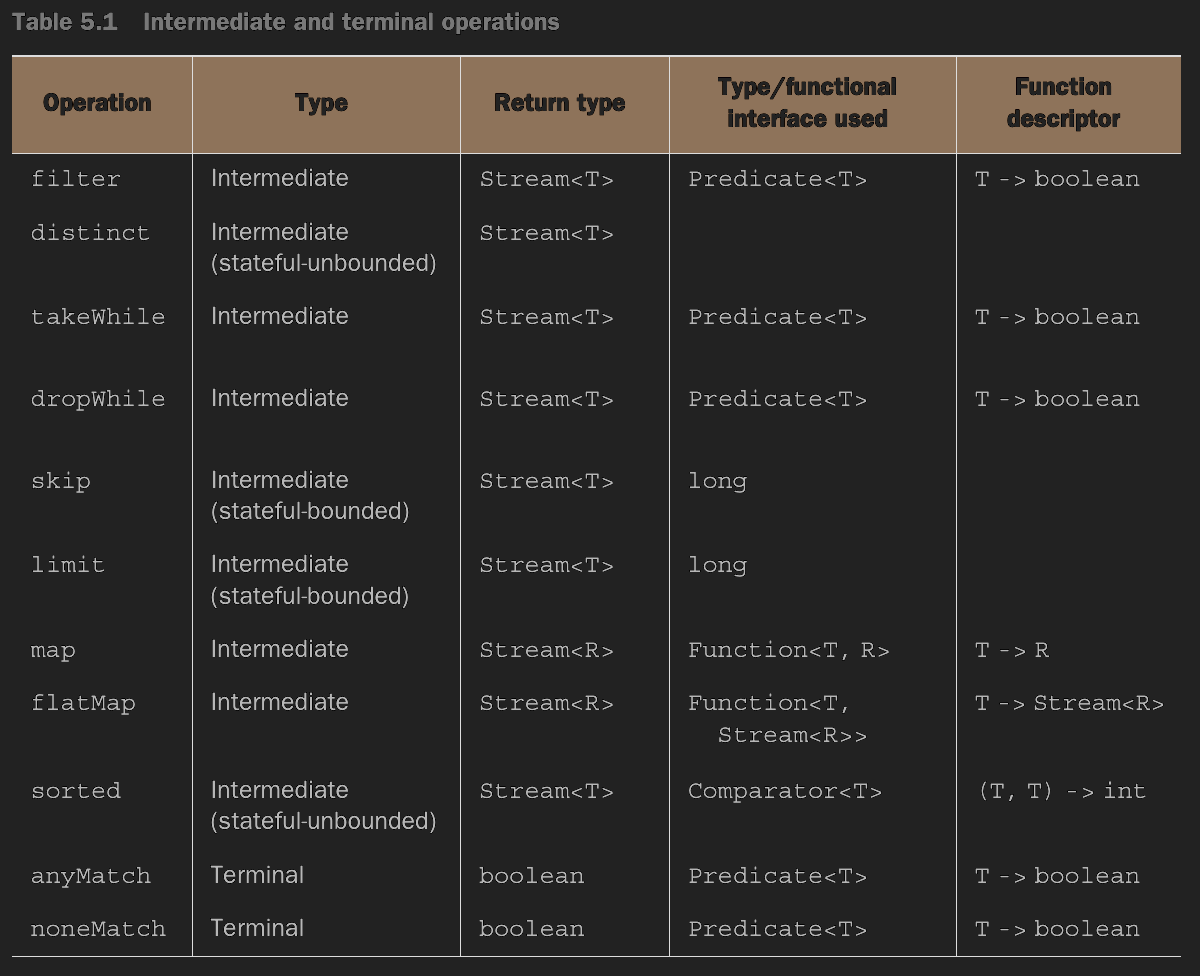


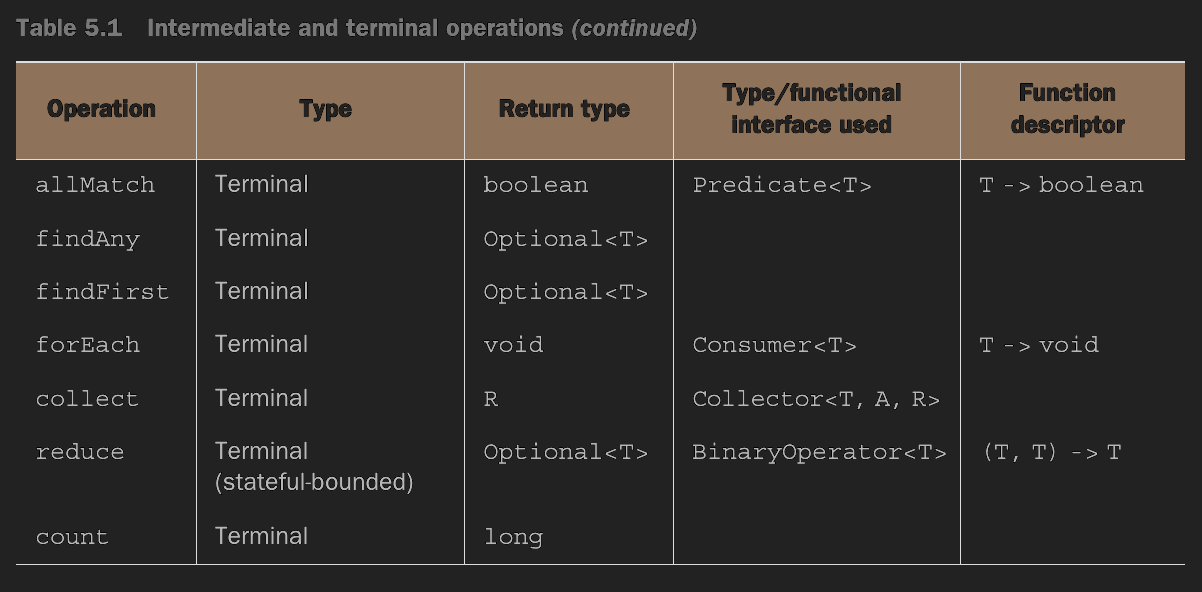

#### 5.6 Putting it all into practice - Traders and Transactions example

In [699]:
// #@title specification
public class Trader { 

    public final String name; 
    public final String city; 

    public Trader(String name, String city) { 
        this.name = name; 
        this.city = city; 
    }

    public String getName() { return this.name; }
    public String getCity() { return this.city; }

    @Override
    public String toString() { 
        return "Trader: " + this.name + " in " + this.city; 
    }
}

public class Transaction { 

    public final Trader trader; 
    public final int year; 
    public final int amount; 

    public Transaction(Trader trader, int year, int amount) { 
        this.trader = trader; 
        this.year = year; 
        this.amount = amount; 
    }

    public Trader getTrader()   { return this.trader; }
    public int getYear()        { return this.year; }
    public int getAmount()      { return this.amount; }

    @Override
    public String toString() { 
        return "{" + this.trader + ", " + this.year +  ", " + this.amount + "}"; 
    }
}

Trader maria = new Trader("María", "Bello"); 
Trader arya = new Trader("Arya", "Medellín"); 
Trader maggie = new Trader("Maggie", "Envigado"); 
Trader mateo = new Trader("Mateo", "Medellín"); 
Trader estiven = new Trader("Estiven", "Itagüí"); 
Trader simon = new Trader("Simon", "Seoul"); 

List<Transaction> transactions = List.of(
    new Transaction(maria, 2020, 200), 
    new Transaction(maria, 2021, 300), 
    new Transaction(maria, 2022, 350), 
    new Transaction(arya, 2021, 200),
    new Transaction(arya, 2022, 100), 
    new Transaction(arya, 2023, 100),
    new Transaction(maggie, 2019, 500),
    new Transaction(maggie, 2022, 300),
    new Transaction(mateo, 2022, 200), 
    new Transaction(mateo, 2023, 200), 
    new Transaction(estiven, 2019, 300), 
    new Transaction(simon, 2023, 100)
)

In [701]:
// TODO: FIND ALL THE TRANSACTIONS MADE IN 2022 
transactions.stream()
            .filter(t -> t.getYear() == 2022)
            .forEach(System.out::println);

{Trader: María in Bello, 2022, 350}
{Trader: Arya in Medellín, 2022, 100}
{Trader: Maggie in Envigado, 2022, 300}
{Trader: Mateo in Medellín, 2022, 200}


In [702]:
// TODO: FIND UNIQUE CITIES WHERE TRADERS WORK 
transactions.stream()
            .map(Transaction::getTrader)
            .map(Trader::getCity)
            .distinct()
            .forEach(System.out::println);

Bello
Medellín
Envigado
Itagüí
Seoul


In [703]:
// TODO: SORT TRANSACTIONS IN DESCENDING ORDER 
transactions.stream()
            .sorted(comparing(Transaction::getAmount).reversed())
            .map(Transaction::getAmount)
            .forEach(amount -> System.out.print(amount + " "));

500 350 300 300 300 200 200 200 200 100 100 100 

In [704]:
// TODO: SORT NAMES OF TRADERS IN AN ALPHABETICAL ORDER
transactions.stream()
            .map(Transaction::getTrader)
            .map(Trader::getName)
            .distinct()
            .sorted()
            .forEach(System.out::println);

Arya
Estiven
Maggie
María
Mateo
Simon


In [705]:
// TODO: FIND IF ANY TRADERS ARE BASED IN ITAGÜÍ 
transactions.stream()
            .map(Transaction::getTrader)
            .anyMatch(t -> t.getCity() == "Itagüí");

true

In [706]:
// TODO: FIND THE SUM AMOUNT OF TRANSACTIONS MADE IN MEDELLÍN, IN 2022
transactions.stream()
            .filter(t -> "Medellín".equals(t.getTrader().getCity()))
            .filter(t -> t.getYear() == 2022)
            .map(Transaction::getAmount)
            .reduce(0, Integer::sum);

300

#### 5.7 Numeric streams 

##### <font color='#F06C7C'> 5.7.1 Primitive stream specializations - `mapToInt`, `boxed`, `OptionalInt`, `getAsInt`

Java 8 introduces three primitive specialized stream interfaces to tackle the issue where unboxing the referential type to a primitive one is needed: `IntStream`, `DoubleStream`, and `LongStream`, which respectively specialize the elments of a stream to be `int`, `double` and `long` - and thereby avoid the boxing costs. 

In [707]:
int summedCalorie = menu.stream()
                            .mapToInt(Dish::getCalorie)
                            .sum();

System.out.print(summedCalorie);

615

Similarly, once you have a numeric stream, you may be interested in converting it back to a nonspecialized stream.

In [708]:
menu.stream()
    .mapToInt(Dish::getCalorie) // map to IntStream
    .boxed()        // back to Stream<Integer>
    .reduce(0, Integer::sum);

615

There is a primitive specialized version of `Optional`: `OptionalInt`, `OptionalDouble`, `OptionalLong`.

In [709]:
OptionalInt maxCalorie = menu.stream()
                                .mapToInt(Dish::getCalorie)
                                .max();

maxCalorie.getAsInt();

150

##### <font color='#F06C7C'> 5.7.2 Numeric ranges - `range`, `rangeClosed`

Java 8 introduces two static methods available on `IntStream` and `LongStream` to help generate ranges: `range` and `rangeClosed`. 

In [710]:
IntStream.rangeClosed(1, 20)
            .filter(n -> n % 2 == 0)
            .forEach(num -> System.out.print(num + " "));

2 4 6 8 10 12 14 16 18 20 

In [711]:
IntStream.range(1, 20)
            .filter(n -> n % 2 == 0)
            .forEach(num -> System.out.print(num + " "));

2 4 6 8 10 12 14 16 18 

##### <font color='#F06C7C'> 5.7.3 Putting numerical streams into practice: Pythagorean triples

###### Partial logic: Generating B values (on assumption where a equals 12)

**`IntStream.map()` expects only another `int` to be returned, which is not what we want, since we try to generate `int[]`, an object other than `int`. So we change `IntStream` to `Stream<Integer>`, since Stream.map() doesn't have such restriction.**

In [712]:
IntStream.rangeClosed(1, 100) 
         .filter(b -> Math.sqrt(12 * 12 + b * b) % 1 == 0)
         .boxed() 
         .map(b -> new int[]{12, b, (int)Math.sqrt(12 * 12 + b * b)}) // array of int
         .forEach(t -> System.out.println(t[0] + " " + t[1] + " " + t[2]));

12 5 13
12 9 15
12 16 20
12 35 37


Or you can use `IntStream.mapToObj`, which can take `Object` type object as its return.

In [713]:
IntStream.rangeClosed(1, 100) 
         .filter(b -> Math.sqrt(12 * 12 + b * b) % 1 == 0)
         .mapToObj(b -> new int[]{12, b, (int)Math.sqrt(12 * 12 + b * b)}) // array of int
         .forEach(t -> System.out.println(t[0] + " " + t[1] + " " + t[2]));

12 5 13
12 9 15
12 16 20
12 35 37


###### Solution code

In [714]:
// TODO: CONSTRUCT A STREAM THAT GENERATES PYTHAGOREAN TRIPLES, 
//       WHERE THE LEAST VALUE OF TUPLES REMAINS UNDER 20 AND THE SECOND LEAST VALUE OF TUPLES REMAINS UNDER 100.

IntStream.rangeClosed(1, 20)
            .boxed()  
            .flatMap(a -> IntStream.rangeClosed(a, 100)
                                   .filter(b -> Math.sqrt(a * a + b * b) % 1 == 0) 
                                   .mapToObj(b -> new int[]{a, b, (int)Math.sqrt(a * a + b * b)}))
            .filter(t -> t[0] <= 20)
            .forEach(t -> System.out.println(t[0] + ", " + t[1] + ", " + t[2]))

3, 4, 5
5, 12, 13
6, 8, 10
7, 24, 25
8, 15, 17
9, 12, 15
9, 40, 41
10, 24, 26
11, 60, 61
12, 16, 20
12, 35, 37
13, 84, 85
14, 48, 50
15, 20, 25
15, 36, 39
16, 30, 34
16, 63, 65
18, 24, 30
18, 80, 82
20, 21, 29
20, 48, 52
20, 99, 101


#### 5.8 Building streams

##### <font color='#F06C7C'> 5.8.1 Streams from values - `Stream.of`

You can create a stream with explicit values by using the static method `Stream.of`. 

In [715]:
Stream.of("Modern", "Java", "In", "Action")
        .map(String::toUpperCase)
        .forEach(System.out::println);

MODERN
JAVA
IN
ACTION


##### <font color='#F06C7C'> 5.8.2 Stream from nullable - `ofNullable`

After playing with streams, you may have encountered a situation where you extracted an object that may be null and then needs to be converted into a stream. In Java 9, a new method was added that allows you create a stream from a nullable object. For example, the method `System.getProperty` returns `null` if there is no property with the given key. Using `Stream.ofNullable` you can write the code more simply. 

In [716]:
Stream<String> possibleNullValue = Stream.of("config", "home", "user")
                                         .flatMap(key -> Stream.ofNullable(System.getProperty(key)));

##### <font color='#F06C7C'> 5.8.3 Streams from arrays - `Arrays.stream`


`Arrays.stream` returns a sequential `Stream` with the specified array as its source. For example, you can convert an array of primitive `int[]` to an `IntStream` using `Arrays.stream`. 

In [717]:
Arrays.stream(new int[] {2, 3, 5, 7, 11}).sum();

28

##### <font color='#F06C7C'> 5.8.4 Streams from files - `Files.lines`

Java's NIO API(non-blocking I/O), which is used for I/O opeartions such as processing a file, has been updated to take advantage of the Streams API. Many static methods in `java.nio.file.Files` return a stream. For example, a useful method is `Files.lines`, which gives you a stream of lines as strings from a given file. 

In [718]:
try { 
    File f = new File("demoData.txt"); 
    f.createNewFile(); 

    FileWriter fw = new FileWriter("demoData.txt"); 

    fw.write("Hello World, Hello Java, Hello Stream API");
    fw.write("Stream API is fun to learn!");

    fw.close(); 

} catch (IOException e) { System.out.print(e); }

In [719]:
long uniqueWords = 0; 
try (Stream<String> lines = Files.lines(Paths.get("demoData.txt"), Charset.defaultCharset())) { 
        uniqueWords = lines.flatMap(line -> Arrays.stream(line.split(" ")))
                           .distinct()
                           .count();

} catch (IOException e) { System.out.print(e); }

System.out.print(uniqueWords);

10

##### <font color='#F06C7C'> 5.8.5 Streams from function: creating infinte streams! - `iterate`, `generate`

The Stream API provides two static methods to generate a stream from a function: `Stream.iterate` and `Stream.generate`. These two operations let you create what we call an <u>infinite stream</u>, a stream that doesn't have a fixed size like when you create a stream from a fixed collection. The `iterate` method takes an initial value and a lambda to apply successively on each new value produced. 

In [720]:
Stream.iterate(2, n -> n + 2)
      .limit(10)
      .forEach(t -> System.out.print(t + " "));

2 4 6 8 10 12 14 16 18 20 

In [721]:
Stream.generate(Math::random)
      .limit(5)
      .forEach(System.out::println);

0.17814826729276256
0.19310802375018943
0.535844961429464
0.796827743531734
0.2555010252156712


###### Constructing Fibonacci series using `iterate`

In [722]:
Stream.iterate(new int[] {0, 1}, t -> new int[]{t[1], t[0] + t[1]})
      .limit(20)
      .map(t -> t[0]) 
      .forEach(t -> System.out.print(t + " "));

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 

### Chapter 6. Collecting data with steams 

In this chapter, you will discover that `collect` is a reduction operation, just like `reduce`, that takes as an argument various recipes for accumulating the elements of a strea into a summary result.


#### 6.1 Collectors in a nutshell 

##### <font color='#F06C7C'> 6.1.1 Collectors as advanced reductions

Collectors are extremely useful because they provide a concise yet flexible way to define <u>**the criteria that `collect` uses to produce the resulting collection**</u>. More speicifically, invoking the `collect` method on a stream <u>**triggers a reduction operation on the elements of the stream itself**</u>. This reduction operation does for you internally what you had to code imperatively otherwise using Stream API. 

 The implementation of the methods of the `Collector` interface defines how to perform a reduction operation on a stream. `Collector` utility class provides lots of static factory methods to conveniently create an instance of the most common collectors that are ready to use. The most straightforward and frequently used collector is the `toList` static method.

In [60]:
transactions.stream()
            .filter(t -> t.getYear() == 2022)
            .collect(Collectors.toList());

[{Trader: María in Bello, 2022, 350}, {Trader: Arya in Medellín, 2022, 100}, {Trader: Maggie in Envigado, 2022, 300}, {Trader: Mateo in Medellín, 2022, 200}]

##### <font color='#F06C7C'> 6.1.2 Predifined collectors 

Predefined collectors offer three main functionalities. 

- <u>**Reducing and summarizing**</u> stream elements to a single value 
- <u>**Grouping**</u>  elements
- <u>**Partitioning**<u> elements 

#### 6.2 Reducing and summarizing

##### <font color='#F06C7C'> 6.2.1 Finding maximum and minimum in a stream of values - `maxBy`, `minBy`

The `Collectors.maxBy` and `Collectors.minBy` take a `Comparator` as argument to compare the elments in the stream. 

In [61]:
menu.stream()
    .collect(Collectors.maxBy(Comparator.comparingInt(Dish::getCalorie)))
    .get();

Pork

##### <font color='#F06C7C'> 6.2.2 Summarization - `summingInt`, `averagingInt`, `summarizingInt`

The `Collectors` class provides a specific factory method for summing: `Collectors.summingInt`. It accepts a function that maps an object into the `int` that has to be summed and returns a collector that performs the requested summarization. 

In [62]:
menu.stream()
    .collect(Collectors.summingInt(Dish::getCalorie));

/* same as 
menu.stream()
    .map(Dish::getCalorie)
    .reduce(0, Integer::sum);
*/

615

In [63]:
menu.stream()
    .collect(Collectors.averagingInt(Dish::getCalorie));

61.5

In [64]:
menu.stream()
    .collect(Collectors.summarizingInt(Dish::getCalorie));

IntSummaryStatistics{count=10, sum=615, min=10, average=61.500000, max=150}

##### <font color='#F06C7C'> 6.2.3 Joining Strings - `joining`

The collector returned by the `joining` factory method concatenates into a single string, all strings resulting from invoking the `toString` method on each object in the stream. The `joining` factory method is <u>**overloaded**</u>, with one of its overloaded variants taking a string used <u>**to delimit two consecutive elements**</u>, so you can obtain a comma-seperated list of the dishes' names. 

In [65]:
menu.stream()
    .map(Dish::getName)
    .collect(Collectors.joining(", "));

Chontaduro, Borojo, Maracuya, Naranja, Guayaba, Platano, Pork, Chicken, Beef, Salmon

##### <font color='#F06C7C'> 6.2.4 Generalized summarization with reduction - `reducing`

All the collectors we’ve discussed so far are, in reality, only convenient specializations of a reduction process that can be defined using the reducing factory method. The Collectors.reducing factory method is a generalization of all of them. It can take three arguments: 

- the first argument is <u>**the starting value**</u> of the reduction operation, and will also be the value returned in cas of a stream with no elements. 
- the second argument is a <u>**function to transform elements into corresponding type**</u> for performing further operations. 
- the third argument is a <u>**`BinaryOperator` that aggregates two items into a single value of the same type**</u>. 

 The one argument that `reducing` accepts is a `BinaryOperator<T>` that's a `BiFunction<T, T, T>`. This means that it wants a function <u>**taking two arguments and returns a value of the same type**</u>. 

In [66]:
menu.stream()
    .collect(Collectors.reducing(0, Dish::getCalorie, (i, j) -> i + j));

615

In [67]:
menu.stream()
    .collect(Collectors.reducing((d1, d2) -> d1.getCalorie() > d2.getCalorie() ? d1 : d2))
    .get(); 

Pork

In [68]:
menu.stream()
    .map(Dish::getName)
    .collect(Collectors.reducing((s1, s2) -> s1 + s2))
    .get();

ChontaduroBorojoMaracuyaNaranjaGuayabaPlatanoPorkChickenBeefSalmon

In [69]:
menu.stream()
    .collect(Collectors.reducing("", Dish::getName, (s1, s2)-> s1 + s2));

ChontaduroBorojoMaracuyaNaranjaGuayabaPlatanoPorkChickenBeefSalmon

#### 6.3 Grouping 

When you use `Collectors.groupingBy` to classify elements into according classes, you pass to the `groupingBy` method a `Function` extracting the corresponding type for each element in the stream. We call this `Function ` a <u>**classification function**</u>. 

It is not always possible to use a method reference when passing the classification function into `groupingBy` method, because <u>you may wish to classify using more complex logic than a simple property accessor.</u>

In [70]:
Map<Dish.Type, List<Dish>> dishesByType = 
        menu.stream()
            .collect(Collectors.groupingBy(Dish::getType));

System.out.print(dishesByType);

{MEAT=[Pork, Chicken, Beef], FISH=[Salmon], FRUIT=[Chontaduro, Borojo, Maracuya, Naranja, Guayaba, Platano]}

In [71]:
public enum CalorieLevel { DIET, NORMAL, FAT }

Map<CalorieLevel, List<Dish>> dishesByCalorieLevel = 
        menu.stream()
            .collect(Collectors.groupingBy(dish -> { 
                    if (dish.getCalorie() <= 40) { return CalorieLevel.DIET; } 
                    else if (dish.getCalorie() <= 80) { return CalorieLevel.NORMAL; }
                    else { return CalorieLevel.FAT; }
                })
            ); 

System.out.print(dishesByCalorieLevel);

{NORMAL=[Chontaduro, Salmon], FAT=[Pork, Chicken, Beef], DIET=[Borojo, Maracuya, Naranja, Guayaba, Platano]}

##### <font color='#F06C7C'> 6.3.1 Manipulating grouped elements - `Collectors.filtering`, `Collectors.mapping`, `Collectors.flatMapping` </font> 

The `Collectors` class overloads the `groupingBy` factory method with one variant taking also a <u>**second argument of type `Collector`**</u> along with the usual classification function. 

The `Collectors.filtering` method is another static factory method fof the `Collectors` class accepting a `Predicate` to filter the elements in each group and a further `Collector` that is used to regroup the filtered elements. 

In [141]:
Map<Dish.Type, List<Dish>> highCalorieDishes = 
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType, 
                                    Collectors.filtering(dish -> dish.getCalorie() > 60, Collectors.toList())));

System.out.println(highCalorieDishes);

{MEAT=[Pork, Chicken, Beef], FISH=[Salmon], FRUIT=[]}


 Another even more common way in which it could be useful to manipulate the grouped elements is transforming them through a `Collectors.mapping` function. It accepts a <u>mapping function</u> and <u>another `Collector` used to gather the elements</u> resulting from the application of that function to each of them. 

In [450]:
Map<Dish.Type, List<String>> dishNamesByType = 
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType, 
                                    Collectors.mapping(Dish::getName, Collectors.toList())
            ));

System.out.print(dishNamesByType);

{MEAT=[Pork, Chicken, Beef], FISH=[Salmon], FRUIT=[Chontaduro, Borojo, Maracuya, Naranja, Guava, Platano]}

You could also use a third `Collector` in combination with the `groupingBy` a to perform a `flatMap` transformation instead of a plain `map`. 

In [768]:
// #@title specification
public class LineItem { 

    public final String name; 

    LineItem(String name) { this.name = name; }

    public String getName() { return name; }

    public String toString() { return name; }
}

public class Order { 

    public final List<LineItem> lineItems; 
    public final String customerName; 

    Order(List<LineItem> lineItems, String customerName) { 
        this.lineItems = lineItems; 
        this.customerName = customerName;
    }

    public List<LineItem> getLineItems() { return lineItems; }
    public String getCustomerName() { return customerName; }
}

LineItem item_1 = new LineItem("Item_1");
LineItem item_2 = new LineItem("Item_2");
LineItem item_3 = new LineItem("Item_3");
LineItem item_4 = new LineItem("Item_4");
LineItem item_5 = new LineItem("Item_5");

Order order_1 = new Order(List.of(item_1, item_2, item_3), "Pipí");
Order order_2 = new Order(List.of(item_3, item_4, item_5), "Maggie");

List<Order> orders = List.of(order_1, order_2);

In [782]:
Map<String, Set<LineItem>> lineItemsByCustomerName = 
        orders.stream()
            .collect(Collectors.groupingBy(
                                    Order::getCustomerName, 
                                    Collectors.flatMapping(order -> order.getLineItems().stream(), Collectors.toSet())));

System.out.print(lineItemsByCustomerName);

{Pipí=[Item_1, Item_2, Item_3], Maggie=[Item_4, Item_5, Item_3]}

##### <font color='#F06C7C'> 6.3.2 Multilevel grouping - `groupingBy`

 The two arguments `Collectors.groupingBy` factory method that we used in a former section to manipulate the elements in the groups resulting from the grouping operation can be used also to perfrom a two-level grouping. 

In [790]:
Map<Dish.Type, Map<CalorieLevel, List<Dish>>> dishesByTypeByCaloricLevel = 
        menu.stream()
            .collect(Collectors.groupingBy(
                                    Dish::getType, 
                                    Collectors.groupingBy(dish -> {
                                        if (dish.getCalorie() <= 40) { return CalorieLevel.DIET; } 
                                        else if (dish.getCalorie() <= 80) { return CalorieLevel.NORMAL; }
                                        else { return CalorieLevel.FAT; }
                                        }
                                    )
            )); 

System.out.print(dishesByTypeByCaloricLevel);

{FRUIT={NORMAL=[Chontaduro], DIET=[Borojo, Maracuya, Naranja, Guava, Platano]}, FISH={NORMAL=[Salmon]}, MEAT={FAT=[Pork, Chicken, Beef]}}

### Chapter 7. Parallel data processing and performance 

### Chapter 8. Collection API enhancements

### Chapter 9. Refactoring, testing and debugging 

## Oracle API Specificatioin Document 

### ***Interface Function`<T, R>`***

: Represents a function that accepts one argument and produces a result.

In [ ]:
import java.util.function.Function;

#### *.apply()*

In [ ]:
public Function<Integer, Integer> func_1 = number -> number + 1; 

Integer result = func_1.apply(1); 

result;

2

#### *.andThen()*

In [ ]:
public Function<Integer, Integer> func_2 = number -> number * 10; 

Function<Integer, Integer> func_1_andThen_func_2 = func_1.andThen(func_2); 

func_1_andThen_func_2.apply(1); 

20

### ***Interface BiFunction`<T, R>`***

: Represents a function that accepts two arguments and produces a result. This is the two-arity specialization of Function.

In [ ]:
import java.util.function.BiFunction; 

In [ ]:
BiFunction<Integer, Integer, Integer> func_bi = (num1, num2) -> (num1 + 1) * (num2); 

func_bi.apply(4, 100);

500

### ***Interface Consumer`<T>`***

: Represents an operation that accepts a single input argument and returns no result. Unlike most other functional interfaces, Consumer is expected to operate via side-effects.

In [ ]:
import java.util.function.Consumer;

In [ ]:
public class Student { 
    public final String name; 
    public final String number; 

    Student(String name, String number) { 
        this.name = name; 
        this.number = number; 
    }
}

Student maria = new Student("Maria", "1234"); 

Consumer<Student> greetingStudent = student -> 
    System.out.println("Hello " + student.name + ", your number is " + student.number + "."); 

greetingStudent.accept(maria); 

Hello Maria, your number is 1234.


### ***Interface BiConsumer `<T, U>`***

: Represents an operation that accepts two input arguments and returns no result. This is the two-arity specialization of Consumer. Unlike most other functional interfaces, BiConsumer is expected to operate via side-effects.

In [ ]:
import java.util.function.BiConsumer

In [ ]:
public class FavSubject { 
    public final String subject; 

    FavSubject(String subject) { this.subject = subject; }
}

FavSubject favSubject = new FavSubject("Linear Algebra"); 

BiConsumer<Student, FavSubject> stateFavSubject = (student, favSubject) -> 
    System.out.println(student.name + "'s favorite subject is " + favSubject.subject + ".");  

stateFavSubject.accept(maria, favSubject);

Maria's favorite subject is Linear Algebra.


### ***Interface Predicate`<T>`***

: Represents a predicate (boolean-valued function) of one argument.

In [ ]:
import java.util.function.Predicate;

#### *.test()*

In [ ]:
public Predicate<String> isValid_BrooklynZipCode = zipCode -> 
        zipCode.length() == 5 &&
        zipCode.compareTo("11201") >= 0 && 
        zipCode.compareTo("11256") <= 0; 

System.out.println(isValid_BrooklynZipCode.test("11200"));
System.out.println(isValid_BrooklynZipCode.test("11247"));

false
true


#### *.and()*

In [ ]:
public Predicate<String> isEven = zipCode -> 
        Integer.parseInt(String.valueOf(zipCode.charAt(zipCode.length() - 1))) % 2 == 0; 

System.out.println(isValid_BrooklynZipCode.and(isEven).test("11202"));
System.out.println(isValid_BrooklynZipCode.and(isEven).test("11203"));

true
false


### ***Interface Supplier`<T>`***

: Represents a supplier of results. There is no requirement that a new or distinct result be returned each time the supplier is invoked.

In [ ]:
import java.util.function.Supplier;

In [ ]:
public Supplier<String> greetSupplier_1 = () -> "Wie geht's?"; 

System.out.println(greetSupplier_1.get());

Wie geht's?


In [ ]:
public Supplier<List<String>> greetSupplier_2 = () -> List.of("Wie geht's?", "Hola, Cómo estás?"); 

System.out.println(greetSupplier_2.get());

[Wie geht's?, Hola, Cómo estás?]


### ***.stream()***

In [ ]:
import java.util.stream.Stream;

#### *.filter()*

: Returns a stream consisting of the elements of this stream that match the given predicate.

In [ ]:
enum Gender { MALE, FEMALE, THIRDGENDER }

class Person { 
    public final String name; 
    public final Gender gender; 

    Person(String name, Gender gender) { 
        this.name = name; 
        this.gender = gender; 
    }

    @Override
    public String toString() {  
        return "Person{" + "name='" + name + '\'' + ", gender=" + gender + '}'; 
    }
}

List<Person> people = List.of(
    new Person("John", Gender.MALE), 
    new Person("MARIA", Gender.FEMALE), 
    new Person("Asha", Gender.MALE),
    new Person("Alice", Gender.FEMALE) 
);

In [ ]:
people.stream()
        .filter(person -> person.gender.equals(Gender.FEMALE))
        .collect(Collectors.toList())
        .forEach(System.out::println);

people.stream()
        .filter(person -> person.gender.equals(Gender.MALE)) 
        .collect(Collectors.toList())
        .forEach(System.out::println); 

Person{name='MARIA', gender=FEMALE}
Person{name='Alice', gender=FEMALE}
Person{name='John', gender=MALE}
Person{name='Asha', gender=MALE}


#### *.map()*

: Returns a stream consisting of the results of applying the given function to the elements of this stream.

In [ ]:
people.stream()
        .map(person -> person.gender) 
        .collect(Collectors.toSet())
        .forEach(System.out::println); 

people.stream()
        .map(person -> person.name) 
        .collect(Collectors.toSet())
        .forEach(System.out::println); 

people.stream()
        .map(person -> person.name) 
        .mapToInt(String::length)
        .forEach(System.out::print); 

FEMALE
MALE
Asha
Alice
John
MARIA
4545

#### *flatMap()*

: Returns a stream consisting of the results of replacing each element of this stream with the contents of a mapped stream produced by applying the provided mapping function to each element. Each mapped stream is closed after its contents have been placed into this stream. (If a mapped stream is null an empty stream is used, instead.)

In [ ]:
class Product { 

    public final String name; 
    public final Integer price;  

    Product(String name, Integer price) { 
        this.name = name; 
        this.price = price; 
    }
}

class Order { 

    public final List<Product> items; 

    Order(List<Product> items) { this.items = items; }

    public List<Product> getItems() { return this.items; }
}

List<Product> products_fruits = List.of(
    new Product("Maracuya", 2), 
    new Product("Naranja", 3), 
    new Product("Maduro", 5)
); 

List<Product> products_stationery = List.of(
    new Product("Pencil", 1), 
    new Product("Note", 4) 
); 

List<Order> orders = List.of(

    new Order(products_fruits), 
    new Order(products_stationery)
);

In [ ]:
orders.stream()
        .flatMap(order -> order.getItems().stream())
        .map(item -> item.name)
        .collect(Collectors.toList())
        .forEach(item -> System.out.print(item + " "));

Maracuya Naranja Maduro Pencil Note 

In [ ]:
orders.stream()
        .flatMap(order -> order.getItems().stream())
        .map(item -> item.price) 
        .reduce(0, Integer::sum);

15

#### *.mapMulti()*

: Returns a stream consisting of the results of replacing each element of this stream with multiple elements, specifically zero or more elements. Replacement is performed by applying the provided mapping function to each element in conjunction with a consumer argument that accepts replacement elements. The mapping function calls the consumer zero or more times to provide the replacement elements.

In [ ]:
// Java Version under JDK 16  

// List<Number> nums = Arrays.asList(1, 2.0, 3, 4.0, 5);
// nums.stream().<Integer>mapMulti((number, consumer) -> { 

//     if (number instanceof Integer) { consumer.accept(numbers); }
// }).collect(Collectors.toList())
// .forEach(System.out::print); 

#### *.allMatch()*

: Returns whether all elements of this stream match the provided predicate. May not evaluate the predicate on all elements if not necessary for determining the result. If the stream is empty then true is returned and the predicate is not evaluated.

In [ ]:
people.stream()
        .allMatch(person -> person.gender.equals(Gender.FEMALE)); 

false

In [ ]:
people.stream()
        .map(person -> person.name) 
        .allMatch(person_name -> person_name.length() < 10);

true

#### *.anyMatch()*

: Returns whether any elements of this stream match the provided predicate. May not evaluate the predicate on all elements if not necessary for determining the result. If the stream is empty then false is returned and the predicate is not evaluated.

In [ ]:
Predicate<Person> anyFemale = person -> person.gender.equals(Gender.FEMALE); 

people.stream()
        .anyMatch(anyFemale);

true

#### *.noneMatch()*

: Returns whether no elements of this stream match the provided predicate. May not evaluate the predicate on all elements if not necessary for determining the result. If the stream is empty then true is returned and the predicate is not evaluated.

In [ ]:
Predicate<Person> thirdGender = person -> Gender.THIRDGENDER.equals(person.gender); 

people.stream()
        .noneMatch(thirdGender); 

true

# Test Driven Development

## Dependency - JUnit

In [ ]:
%%loadFromPOM 
<!-- https://mvnrepository.com/artifact/org.junit.jupiter/junit-jupiter-api -->
<dependency>
  <groupId>junit</groupId>
  <artifactId>junit</artifactId>
  <version>4.13.2</version>
</dependency>

In [ ]:
import org.junit.*; 
import static org.junit.Assert.assertEquals; 

## assertEquals()

In [ ]:
public int findMax(int arr[]) { 

    int max = 0; 
    for (int i = 1; i < arr.length; i++) { 

        if (max < arr[i]) { max = arr[i]; }
    }

    return max; 
}

@Test
public void testFindMax() { 
    
    System.out.println("assertEquals()"); 
    assertEquals(4, findMax(new int[] {1, 3, 4, 2})); 
}

testFindMax();

assertEquals()


# ⚙️ Type Conversion / Compatibility 

### Primitive array ↔︎ Interface List  

primitive to List  

In [ ]:
int[] primitive = new int[] {1, 2, 3, 4}; 

List<Integer> digits = Arrays
                            .stream(primitive)
                            .boxed()
                            .collect(Collectors.toList()); 

digits.forEach(num -> System.out.print(num));

1234

List to primitive 

In [ ]:
int[] nums = digits.stream()
                    .mapToInt(i -> i)
                    .toArray(); 

for (int i = 0; i < nums.length; i++) { 
    System.out.print(nums[i]); 
}

1234

### char of String to Integer  

In [ ]:
String str1 = "1234"; 

Integer.parseInt(String.valueOf(str1.charAt(str1.length() - 1)));

4